In [1]:
import os
import pandas, numpy, seaborn
import sklearn, sklearn.decomposition, sklearn.decomposition, sklearn.pipeline, sklearn.preprocessing
import scipy, scipy.signal
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})
import cycler
import pandas as pd
import re 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
# Open GDC manifest file.
mf_name = r'C:\Users\valld\Downloads\gdc_manifest.2023-09-20.txt'
data = pd.read_csv(mf_name,delimiter='\t')
# Directory where the files are saved.
output_directory = r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
os.makedirs(output_directory, exist_ok=True)
count = 0
for _, row in data.iterrows():
    # Loop through the file IDs and download each file.
    file_id = str(row[0])
    print(file_id)
    data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)
    response = requests.get(data_endpt, headers={"Content-Type": "application/json"})
    # Check if the request was successful before proceeding.
    if response.status_code == 200:
        # The file name can be found in the header within the Content-Dispositionkey.
        response_head_cd = response.headers.get("Content-Disposition")
        if response_head_cd:
            file_name = re.findall("filename=(.+)", response_head_cd)[0]
            # Join the directory path with the file name to create the complete file path.
            output_file_path = os.path.join(output_directory, file_name)
            with open(output_file_path, "wb") as output_file:
                output_file.write(response.content)
                count = count + 1
                print(f"Downloaded file nº {count}: {file_name} " )
        else:
             print(f"Failed to get file name for file ID: {file_id}")
    else:
        print(f"Failed to download file ID: {file_id} - Status Code: {response.status_code}")'''

In [2]:
#also download metadata and try to associate patient ID's with case ID's
# Get the list of all files and directories in the root directory
path = r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
# print the list
#print(dir_list)

Files and directories in ' C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects ' :


In [3]:
#We use a for loop to create a list containing the names of the files in our directory
#for element in dir_list:
    #print(element)

In [ ]:
dir_list
path_to_data=r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
os.listdir(path_to_data)

In [ ]:
concat_df=pandas.DataFrame()
print(type(concat_df))
for element in dir_list: 
    #We first visualize the name of the file 
    #print(element)
    #specify path
    path_to_data=r"C:/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/"
    full_path=path_to_data+element
#Create a dataframe of that file
    df = pandas.read_csv(full_path, sep="\t",skiprows=1, index_col=0)
    df.drop(['gene_name', 'gene_type'], axis=1, inplace = True)
    df.drop(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'], axis=0, inplace= True)
#specify row and column indexes
#file_id = str(row[1]).split('.')[0]
#take the first column of each one
    expression_column = df['tpm_unstranded']
    expression_column = expression_column.rename(element.split('.')[0])   ######################
    if concat_df.shape == (0,0):
        concat_df = expression_column 
        print('starting to construct the concatenated dataframe')
    else:
        concat_df = pandas.concat([concat_df, expression_column], axis=1)

In [5]:
df
concat_df

00f54652-691e-4446-869a-4dd51c236f56  \
gene_id                                                    
ENSG00000000003.15                               19.4123   
ENSG00000000005.6                                 0.1240   
ENSG00000000419.13                               40.4957   
ENSG00000000457.14                                5.0002   
ENSG00000000460.17                                0.7564   
...                                                  ...   
ENSG00000288669.1                                 0.0000   
ENSG00000288670.1                                 6.7877   
ENSG00000288671.1                                 0.0000   
ENSG00000288674.1                                 0.0381   
ENSG00000288675.1                                 1.0170   

                    017f7806-7804-43b9-8123-e1b48d2d6496  \
gene_id                                                    
ENSG00000000003.15                               31.8278   
ENSG00000000005.6                                 0.0574   
ENSG00000000419.13                               83.6473   
ENSG00000000457.14                                5.2668   
ENSG00000000460.17                                1.7167   
...                                                  ...   
ENSG00000288669.1                                 0.0000   
ENSG00000288670.1                                 8.3903   
ENSG00000288671.1                                 0.0000   
ENSG00000288674.1                                 0.0308   
ENSG00000288675.1                                 0.1008   

                    02baceff-cbab-41cb-b801-be18ad6991b2  \
gene_id                                                    
ENSG00000000003.15                               80.8500   
ENSG00000000005.6                                 0.3693   
ENSG00000000419.13                              121.4975   
ENSG00000000457.14                               14.0190   
ENSG00000000460.17                                2.4786   
...                                                  ...   
ENSG00000288669.1                                 0.0000   
ENSG00000288670.1                                24.1354   
ENSG00000288671.1                                 0.0000   
ENSG00000288674.1                                 0.0405   
ENSG00000288675.1                                 0.2781   

                    036f7712-a636-4198-b568-6c85d9db4a3b  \
gene_id                                                    
ENSG00000000003.15                               41.2435   
ENSG00000000005.6                                 0.1329   
ENSG00000000419.13                               57.5444   
ENSG00000000457.14                                4.3661   
ENSG00000000460.17                                2.0541   
...                                                  ...   
ENSG00000288669.1                                 0.0000   
ENSG00000288670.1                                 7.5282   
ENSG00000288671.1                                 0.0000   
ENSG00000288674.1                                 0.0272   
ENSG00000288675.1                                 0.6813   

                    0386037f-728c-47b0-93d0-6bb81b8b2a05  \
gene_id                                                    
ENSG00000000003.15                               39.2759   
ENSG00000000005.6                                 0.2247   
ENSG00000000419.13                               72.3126   
ENSG00000000457.14                                4.4973   
ENSG00000000460.17                                0.7963   
...                                                  ...   
ENSG00000288669.1                                 0.0000   
ENSG00000288670.1                                18.7211   
ENSG00000288671.1                                 0.0000   
ENSG00000288674.1                                 0.0345   
ENSG00000288675.1                                 0.5264   

                    04bbfd91-0b04-4659-a32b-ee3afbc1f30e  \
gene_id                                                

In [ ]:
#convert df to csv.
concat_df.to_csv('/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/tpm.csv')

In [6]:
tpm = pandas.read_csv('/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/tpm.csv', index_col=0)
print(tpm.shape)
tpm.head()

(60660, 521)


00f54652-691e-4446-869a-4dd51c236f56  \
gene_id                                                    
ENSG00000000003.15                               19.4123   
ENSG00000000005.6                                 0.1240   
ENSG00000000419.13                               40.4957   
ENSG00000000457.14                                5.0002   
ENSG00000000460.17                                0.7564   

                    017f7806-7804-43b9-8123-e1b48d2d6496  \
gene_id                                                    
ENSG00000000003.15                               31.8278   
ENSG00000000005.6                                 0.0574   
ENSG00000000419.13                               83.6473   
ENSG00000000457.14                                5.2668   
ENSG00000000460.17                                1.7167   

                    02baceff-cbab-41cb-b801-be18ad6991b2  \
gene_id                                                    
ENSG00000000003.15                               80.8500   
ENSG00000000005.6                                 0.3693   
ENSG00000000419.13                              121.4975   
ENSG00000000457.14                               14.0190   
ENSG00000000460.17                                2.4786   

                    036f7712-a636-4198-b568-6c85d9db4a3b  \
gene_id                                                    
ENSG00000000003.15                               41.2435   
ENSG00000000005.6                                 0.1329   
ENSG00000000419.13                               57.5444   
ENSG00000000457.14                                4.3661   
ENSG00000000460.17                                2.0541   

                    0386037f-728c-47b0-93d0-6bb81b8b2a05  \
gene_id                                                    
ENSG00000000003.15                               39.2759   
ENSG00000000005.6                                 0.2247   
ENSG00000000419.13                               72.3126   
ENSG00000000457.14                                4.4973   
ENSG00000000460.17                                0.7963   

                    04bbfd91-0b04-4659-a32b-ee3afbc1f30e  \
gene_id                                                    
ENSG00000000003.15                               59.5595   
ENSG00000000005.6                                 0.4833   
ENSG00000000419.13                              106.6697   
ENSG00000000457.14                               13.8262   
ENSG00000000460.17                                2.6286   

                    04c7e26b-8546-47ca-b612-c05d7923cffc  \
gene_id                                                    
ENSG00000000003.15                               32.3194   
ENSG00000000005.6                                 0.1869   
ENSG00000000419.13                               86.1143   
ENSG00000000457.14                                6.5052   
ENSG00000000460.17                                1.0472   

                    05c2e90c-544c-425c-8bc2-961653ee1e7b  \
gene_id                                                    
ENSG00000000003.15                               49.0701   
ENSG00000000005.6                                 0.1058   
ENSG00000000419.13                               80.7573   
ENSG00000000457.14                                8.5967   
ENSG00000000460.17                                2.1619   

                    05e8a50c-4478-4d28-977b-68cc319493a9  \
gene_id                                                    
ENSG00000000003.15                               49.1113   
ENSG00000000005.6                                 0.1501   
ENSG00000000419.13                              101.3053   
ENSG00000000457.14                                9.7299   
ENSG00000000460.17                                2.6097   

                    06735819-fc94-4e07-b528-8bea573f5ace  ...  \
gene_id                                                   ...   
ENSG00000000003.15                               72.6895  ...   
ENSG00000000005.6                   

In [7]:
#filter out genes that (almost) never show up   ##############################################################################
expressed_genes = tpm[tpm.max(axis=1) >= 8]
expressed_genes.shape

#bring data to log2 TPM
log2_tpm_PO = numpy.log2(expressed_genes + 1)
log2_tpm_PO

00f54652-691e-4446-869a-4dd51c236f56  \
gene_id                                                    
ENSG00000000003.15                              4.351367   
ENSG00000000419.13                              5.374890   
ENSG00000000457.14                              2.585011   
ENSG00000000938.13                              2.610275   
ENSG00000000971.16                              3.133695   
...                                                  ...   
ENSG00000288573.1                               2.541118   
ENSG00000288596.2                               3.140697   
ENSG00000288612.1                               2.267206   
ENSG00000288658.1                               0.245009   
ENSG00000288670.1                               2.961197   

                    017f7806-7804-43b9-8123-e1b48d2d6496  \
gene_id                                                    
ENSG00000000003.15                              5.036846   
ENSG00000000419.13                              6.403392   
ENSG00000000457.14                              2.647729   
ENSG00000000938.13                              3.567631   
ENSG00000000971.16                              7.188441   
...                                                  ...   
ENSG00000288573.1                               1.498149   
ENSG00000288596.2                               2.158919   
ENSG00000288612.1                               0.692070   
ENSG00000288658.1                               0.210389   
ENSG00000288670.1                               3.231171   

                    02baceff-cbab-41cb-b801-be18ad6991b2  \
gene_id                                                    
ENSG00000000003.15                              6.354911   
ENSG00000000419.13                              6.936608   
ENSG00000000457.14                              3.908717   
ENSG00000000938.13                              3.186786   
ENSG00000000971.16                              5.688273   
...                                                  ...   
ENSG00000288573.1                               3.072192   
ENSG00000288596.2                               3.460860   
ENSG00000288612.1                               1.013498   
ENSG00000288658.1                               1.273456   
ENSG00000288670.1                               4.651649   

                    036f7712-a636-4198-b568-6c85d9db4a3b  \
gene_id                                                    
ENSG00000000003.15                              5.400657   
ENSG00000000419.13                              5.871459   
ENSG00000000457.14                              2.423874   
ENSG00000000938.13                              4.123310   
ENSG00000000971.16                              6.598810   
...                                                  ...   
ENSG00000288573.1                               0.911193   
ENSG00000288596.2                               1.627000   
ENSG00000288612.1                               0.464877   
ENSG00000288658.1                               0.092343   
ENSG00000288670.1                               3.092241   

                    0386037f-728c-47b0-93d0-6bb81b8b2a05  \
gene_id                                                    
ENSG00000000003.15                              5.331845   
ENSG00000000419.13                              6.195989   
ENSG00000000457.14                              2.458723   
ENSG00000000938.13                              2.984334   
ENSG00000000971.16                              2.575216   
...                                                  ...   
ENSG00000288573.1                               1.917890   
ENSG00000288596.2                               1.813771   
ENSG00000288612.1                               0.606158   
ENSG00000288658.1                               2.268794   
ENSG00000288670.1                               4.301668   

                    04bbfd91-0b04-4659-a32b-ee3afbc1f30e  \
gene_id                                                

80


findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

18.15245025585937


findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

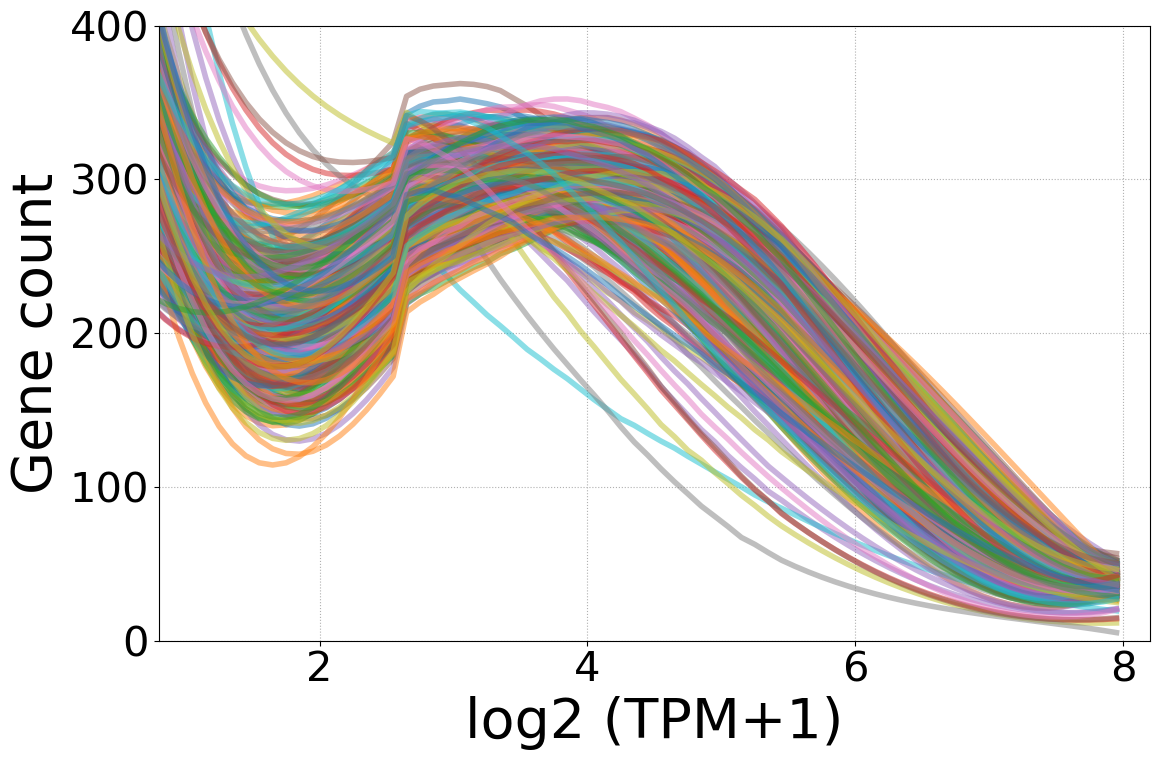

In [8]:
'''HISTOGRAM'''
found_max = 8 # especifico el valor màxim aqui. El poso una mica mes alt
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0  #defineixo absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()  #afegeixo les columnes amb les que vull treballar a una llista working_samples

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample] #selecciono una columna i la guardo a log2TPM
    if max(log2TPM) > absolute_max:   #si el valor maxim de log2TPM és major que l'absolut_max, absolut_max passa a ser aquest valor
        absolute_max = max(log2TPM) 
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
    
# agafa el valor de dalt del mig de cada barra
# agafa els 2 valors dels extrems de baix de cada barra i resta i divideix entre 2 per obtenir un unic valor de baix 
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin   
    x = x[:-1]   #elimina l'ultim valor pq no el necessitem
    #print(x)   #--> fem un 'print' per veure les dades i agafar el segon pic
    #print(hist)
    
    plotting_x = x#[1:500] #depen de com surti lhistograma agafem a pertir de unes dades o altres 
    plotting_hist = hist
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist,'.', alpha=1/3)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha = 1/2)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)+0.75, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))
matplotlib.pyplot.tight_layout()
print(absolute_max)

In [9]:
#mirem quin és el vallor màxim que tenim abans de fer l'histograma anterior per saber quins paràmetres hem de posar
maxim = max(x)
print(maxim)

7.95


findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

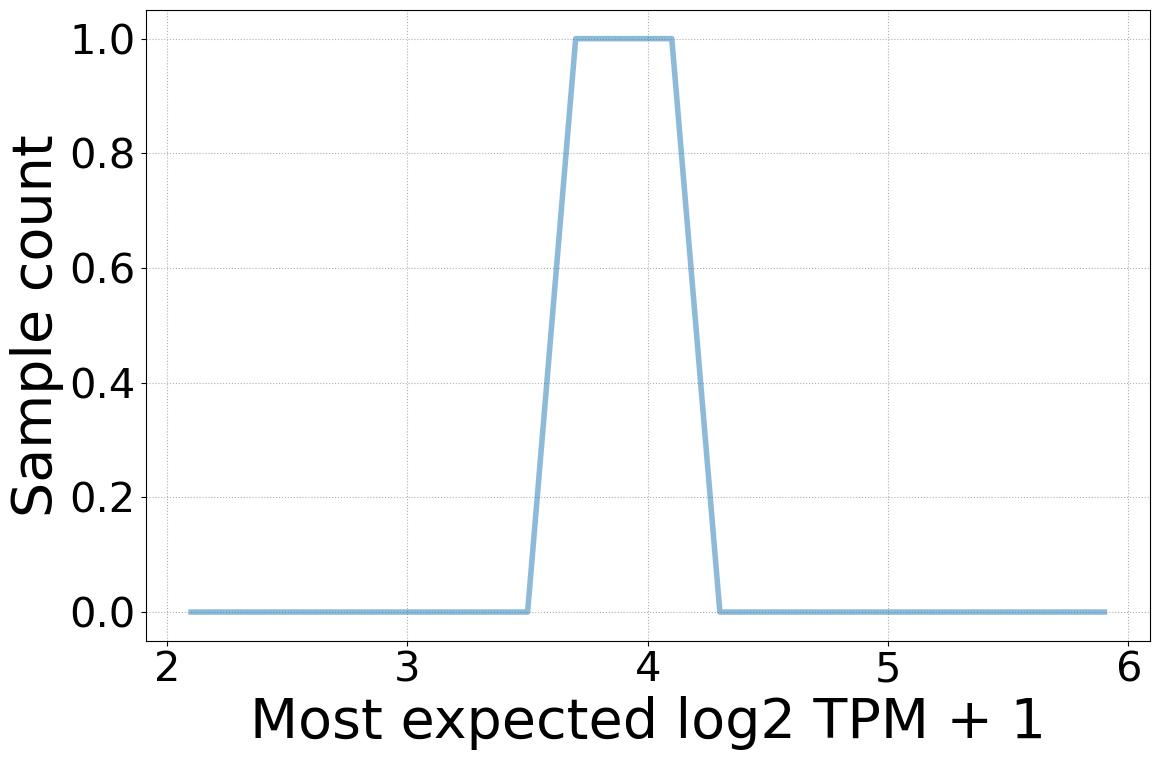

In [10]:
hist, bin_edges = numpy.histogram(most_likely_expressions, bins=20, range=(2, 6))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

matplotlib.pyplot.plot(x, hist, '-', lw=4, alpha=1/2)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Most expected log2 TPM + 1')
matplotlib.pyplot.ylabel('Sample count')
matplotlib.pyplot.tight_layout()

In [ ]:
median = numpy.median(most_likely_expressions)
std = numpy.std(most_likely_expressions)
threshold = median - 1.96*std
print(median, std, threshold)
print()

new_threshold = 3.5
suspicious_samples = []
for i in range(len(most_likely_expressions)):
    if most_likely_expressions[i] <= new_threshold:
        print(working_samples[i], new_threshold, most_likely_expressions[i])
        suspicious_samples.append(working_samples[i])
print(suspicious_samples)

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

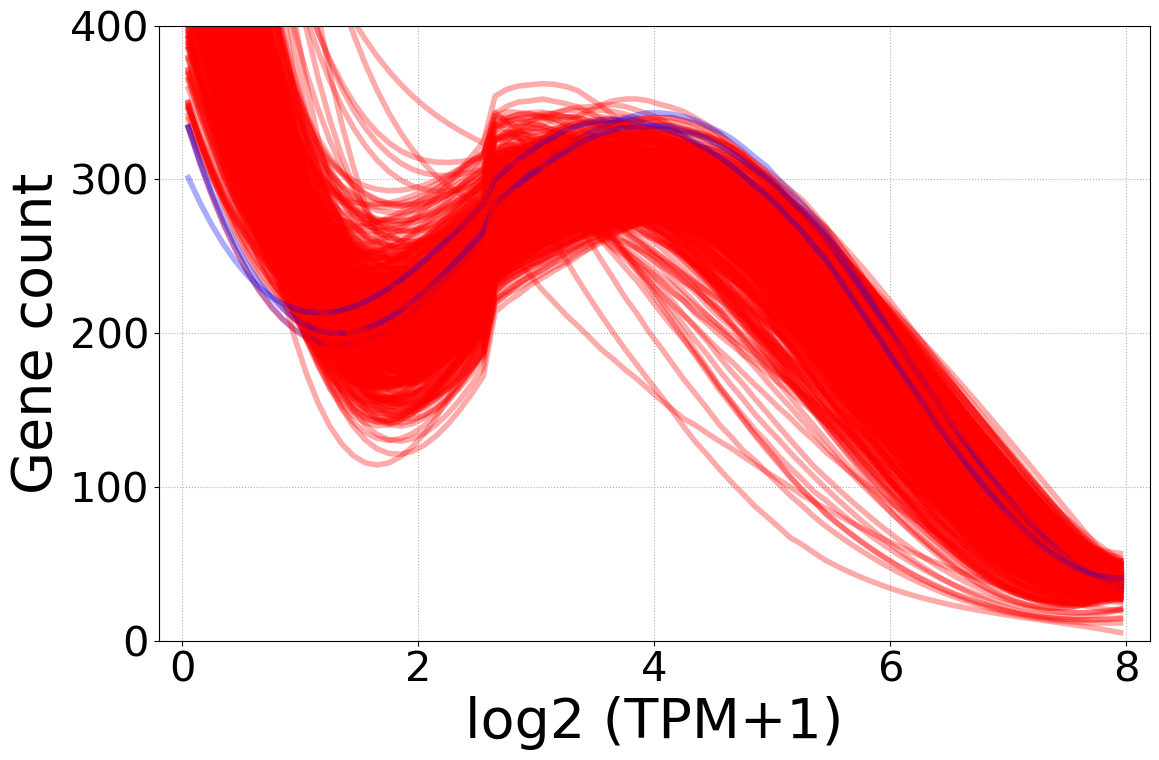

In [12]:
for i in range(len(working_samples)):
    if working_samples[i] in suspicious_samples:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='red')
    else:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='blue')
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

In [13]:
#We use '.transpose()' function to change df format so we obtain values that were in columns now in rows and viceversa
transpose = log2_tpm_PO.transpose()
print(transpose.shape)
transpose.head()

(521, 18986)


gene_id                               ENSG00000000003.15  ENSG00000000419.13  \
00f54652-691e-4446-869a-4dd51c236f56            4.351367            5.374890   
017f7806-7804-43b9-8123-e1b48d2d6496            5.036846            6.403392   
02baceff-cbab-41cb-b801-be18ad6991b2            6.354911            6.936608   
036f7712-a636-4198-b568-6c85d9db4a3b            5.400657            5.871459   
0386037f-728c-47b0-93d0-6bb81b8b2a05            5.331845            6.195989   

gene_id                               ENSG00000000457.14  ENSG00000000938.13  \
00f54652-691e-4446-869a-4dd51c236f56            2.585011            2.610275   
017f7806-7804-43b9-8123-e1b48d2d6496            2.647729            3.567631   
02baceff-cbab-41cb-b801-be18ad6991b2            3.908717            3.186786   
036f7712-a636-4198-b568-6c85d9db4a3b            2.423874            4.123310   
0386037f-728c-47b0-93d0-6bb81b8b2a05            2.458723            2.984334   

gene_id                               ENSG00000000971.16  ENSG00000001036.14  \
00f54652-691e-4446-869a-4dd51c236f56            3.133695            5.695910   
017f7806-7804-43b9-8123-e1b48d2d6496            7.188441            5.396410   
02baceff-cbab-41cb-b801-be18ad6991b2            5.688273            5.910279   
036f7712-a636-4198-b568-6c85d9db4a3b            6.598810            5.631902   
0386037f-728c-47b0-93d0-6bb81b8b2a05            2.575216            6.038208   

gene_id                               ENSG00000001084.13  ENSG00000001167.14  \
00f54652-691e-4446-869a-4dd51c236f56            3.336098            4.101995   
017f7806-7804-43b9-8123-e1b48d2d6496            3.753476            4.853177   
02baceff-cbab-41cb-b801-be18ad6991b2            4.933129            5.779504   
036f7712-a636-4198-b568-6c85d9db4a3b            3.638711            4.427928   
0386037f-728c-47b0-93d0-6bb81b8b2a05            4.588091            4.207721   

gene_id                               ENSG00000001460.18  ENSG00000001461.17  \
00f54652-691e-4446-869a-4dd51c236f56            2.679424            5.199743   
017f7806-7804-43b9-8123-e1b48d2d6496            2.432612            5.337971   
02baceff-cbab-41cb-b801-be18ad6991b2            2.667438            5.551842   
036f7712-a636-4198-b568-6c85d9db4a3b            2.903366            5.438586   
0386037f-728c-47b0-93d0-6bb81b8b2a05            3.067725            5.763497   

gene_id                               ...  ENSG00000288398.1  \
00f54652-691e-4446-869a-4dd51c236f56  ...           2.895574   
017f7806-7804-43b9-8123-e1b48d2d6496  ...           2.273247   
02baceff-cbab-41cb-b801-be18ad6991b2  ...           4.697963   
036f7712-a636-4198-b568-6c85d9db4a3b  ...           3.041839   
0386037f-728c-47b0-93d0-6bb81b8b2a05  ...           4.091810   

gene_id                               ENSG00000288543.1  ENSG00000288547.3  \
00f54652-691e-4446-869a-4dd51c236f56           0.000000           2.705779   
017f7806-7804-43b9-8123-e1b48d2d6496           2.817623           0.640251   
02baceff-cbab-41cb-b801-be18ad6991b2           0.000000           0.880019   
036f7712-a636-4198-b568-6c85d9db4a3b           2.248049           0.882056   
0386037f-728c-47b0-93d0-6bb81b8b2a05           0.000000           4.018892   

gene_id                               ENSG00000288558.2  ENSG00000288559.1  \
00f54652-691e-4446-869a-4dd51c236f56           1.971516           1.612069   
017f7806-7804-43b9-8123-e1b48d2d6496           1.055196           1.395885   
02baceff-cbab-41cb-b801-be18ad6991b2           3.231156           2.247988   
036f7712-a636-4198-b568-6c85d9db4a3b           1.190488           1.209266   
0386037f-728c-47b0-93d0-6bb81b8b2a05           2.295488           1.164915   

gene_id                               ENSG00000288573.1  ENSG00000288596.2  \
00f54652-691e-4446-869a-4dd51c236f56           2.541118           3.140697   
017f7806-7804-43b9-8123-e1b48d2d6496           1.498149           2.158919   
02baceff-cbab-41cb-b801-be18ad6991b2  

In [14]:
from scipy.stats import zscore
# We have a DataFrame called 'log2_tpm_PO' with gene expresion data and we want to distinguish the top_500 genes frfom the 
#other ones. Top 500 genes are the ones with higher mean and higher variance. 
# Calcula la media y la varianza de expresión para cada gen
average_expression = log2_tpm_PO.mean(axis=1)
variance_by_rows = log2_tpm_PO.var(axis=1)
# Calcula los puntajes Z para las columnas 'Average' y 'Variance'
average_zscores = zscore(average_expression)
variance_zscores = zscore(variance_by_rows)
# Calcula el puntaje de bondad sumando los puntajes Z de media y varianza
goodness_score = average_zscores + variance_zscores
# Crea un DataFrame con los puntajes de bondad y los nombres de los genes
genes_exp = pd.DataFrame({'Goodness_Score': goodness_score, 'Gene_Name': log2_tpm_PO.index})
# Selecciona los 500 genes con los puntajes de bondad más altos
top_genes = genes_exp.nlargest(500, 'Goodness_Score')
#Select the 50 top genes 
top_50_genes = genes_exp.nlargest(50, 'Goodness_Score')
# Muestra los primeros 5 genes en la lista de los mejores 500 genes
print(top_genes.head(5))

                   Goodness_Score          Gene_Name
gene_id                                             
ENSG00000211592.8       19.459970  ENSG00000211592.8
ENSG00000211896.7       19.187173  ENSG00000211896.7
ENSG00000239951.1       15.101965  ENSG00000239951.1
ENSG00000253755.1       14.279649  ENSG00000253755.1
ENSG00000211895.5       14.068674  ENSG00000211895.5


findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

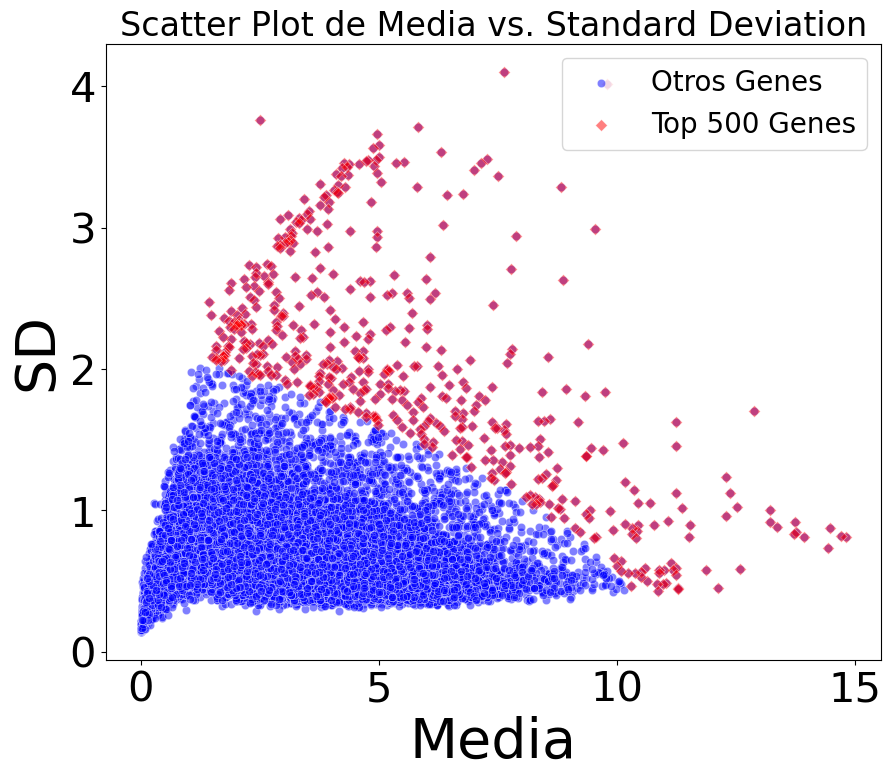

In [15]:
'''scatterplot with standard deviation'''
# Calcular la media y la desviación estándar para cada gen
media = transpose.mean()
std_dev = transpose.std()
# Crear un DataFrame con las medias y desviaciones estándar
data_for_scatter = pd.DataFrame({'Media': media, 'Desviación Estándar': std_dev})
# Crear un scatter plot
plt.figure(figsize=(10, 8))
mida=10
# Crear un scatter plot con todos los genes en azul y forma circular
sns.scatterplot(x='Media', y='Desviación Estándar', data=data_for_scatter, color='blue', alpha=1/2, label='Otros Genes')
# Crear un scatter plot con los 500 mejores genes en rojo y forma cuadrada
sns.scatterplot(x='Media', y='Desviación Estándar', data=data_for_scatter.loc[top_genes.index], color='red', marker='D', alpha=1/2, label='Top 500 Genes')
# Personalizar el scatter plot
plt.title('Scatter Plot de Media vs. Standard Deviation')
plt.xlabel('Media')
plt.ylabel('SD')
# Mostrar el scatter plot con una leyenda
plt.legend()
# Mostrar el scatter plot
plt.show()

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

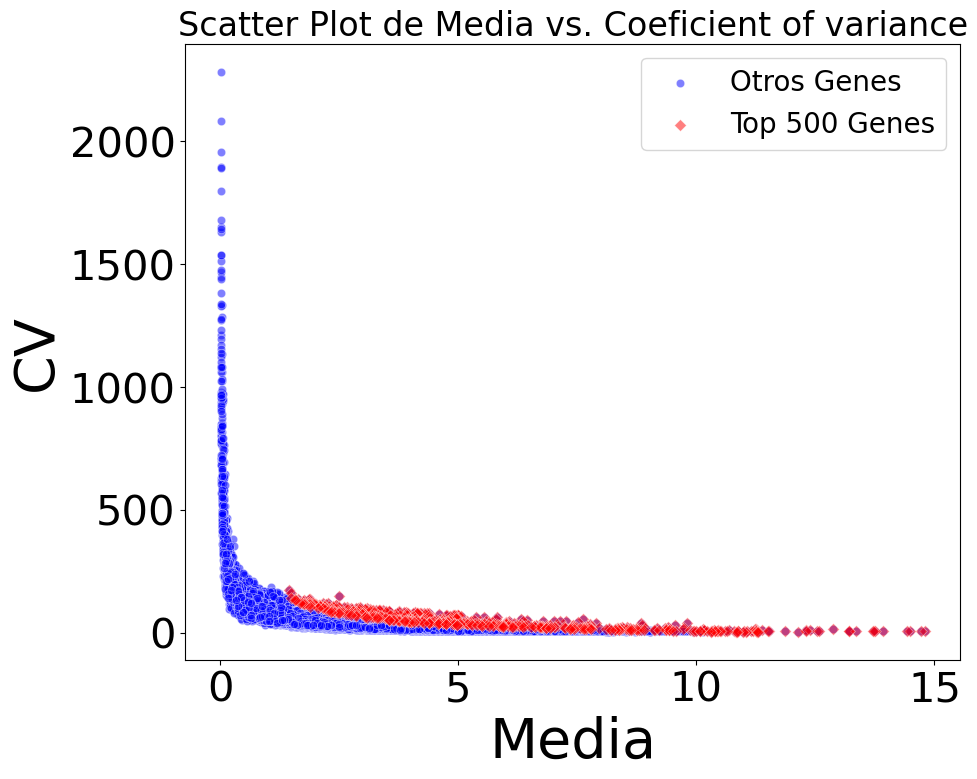

'fix a threshold '

In [16]:
'''SCATTERPLOT WITH COEFICIENT OF VARIANCE'''

# Calcular la media y la desviación estándar para cada gen
media = transpose.mean()
std_dev = transpose.std()
cv = (std_dev / media) * 100  # Calcula el CV y multiplica por 100 para obtener un porcentaje

# Crear un DataFrame con las medias y desviaciones estándar
data_for_scatter = pd.DataFrame({'Media': media, 'Coeficient of variance': cv})

# Crear un scatter plot
plt.figure(figsize=(10, 8))

mida=10

# Crear un scatter plot con todos los genes en azul y forma circular
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter, color='blue', alpha=1/2, label='Otros Genes')

# Crear un scatter plot con los 500 mejores genes en rojo y forma cuadrada
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter.loc[top_genes.index], color='red', marker='D', alpha=1/2, label='Top 500 Genes')

# Personalizar el scatter plot
plt.title('Scatter Plot de Media vs. Coeficient of variance')
plt.xlabel('Media')
plt.ylabel('CV')

# Mostrar el scatter plot con una leyenda
plt.legend()

# Mostrar el scatter plot
plt.show()


'''fix a threshold '''

In [17]:
import pandas as pd
# Supongamos que 'top_genes' contiene los nombres de los genes que deseas mantener
important_genes = top_50_genes['Gene_Name'].tolist()
# Filtra las columnas de 'transpose' para mantener solo los genes presentes en 'top_genes'
important_dataframe = transpose[important_genes]
important_dataframe
############################
important_500_genes = top_genes['Gene_Name'].tolist()
important_500_dataframe = transpose[important_500_genes]
important_500_dataframe

gene_id                               ENSG00000211592.8  ENSG00000211896.7  \
00f54652-691e-4446-869a-4dd51c236f56          12.654493          11.277781   
017f7806-7804-43b9-8123-e1b48d2d6496          11.151510           7.076933   
02baceff-cbab-41cb-b801-be18ad6991b2          13.240121          11.884235   
036f7712-a636-4198-b568-6c85d9db4a3b          15.350830          13.716034   
0386037f-728c-47b0-93d0-6bb81b8b2a05           8.687352           6.493431   
...                                                 ...                ...   
fdc7d01c-8737-4959-a13f-a6f85f037e65           8.346090           5.671480   
feabad6d-2c34-4491-bfd3-afd36b1435fc          13.484108          11.729264   
fecd3669-e812-49ce-8914-9d84ded36f35           7.419147           1.856428   
ff101b50-3317-4296-a0bf-2316cb4b039a          11.962107          10.079871   
ffe2a9f5-b8ca-490f-b9b0-656738c3b586          12.547705          10.623540   

gene_id                               ENSG00000239951.1  ENSG00000253755.1  \
00f54652-691e-4446-869a-4dd51c236f56           8.911985           7.086845   
017f7806-7804-43b9-8123-e1b48d2d6496           7.212101           6.423035   
02baceff-cbab-41cb-b801-be18ad6991b2           9.081297           8.065871   
036f7712-a636-4198-b568-6c85d9db4a3b          10.326256           9.049730   
0386037f-728c-47b0-93d0-6bb81b8b2a05           3.608040           3.787662   
...                                                 ...                ...   
fdc7d01c-8737-4959-a13f-a6f85f037e65           3.971976           3.230680   
feabad6d-2c34-4491-bfd3-afd36b1435fc           9.420037           8.632927   
fecd3669-e812-49ce-8914-9d84ded36f35           3.267790           0.306146   
ff101b50-3317-4296-a0bf-2316cb4b039a           6.798901           7.326636   
ffe2a9f5-b8ca-490f-b9b0-656738c3b586           7.205062           7.196892   

gene_id                               ENSG00000211895.5  ENSG00000211677.2  \
00f54652-691e-4446-869a-4dd51c236f56           8.458653           8.776716   
017f7806-7804-43b9-8123-e1b48d2d6496          10.290145           9.133247   
02baceff-cbab-41cb-b801-be18ad6991b2          10.190219           9.284320   
036f7712-a636-4198-b568-6c85d9db4a3b          11.198357          10.037491   
0386037f-728c-47b0-93d0-6bb81b8b2a05           8.254596           5.477386   
...                                                 ...                ...   
fdc7d01c-8737-4959-a13f-a6f85f037e65           7.111472           4.613219   
feabad6d-2c34-4491-bfd3-afd36b1435fc          10.653020           9.818323   
fecd3669-e812-49ce-8914-9d84ded36f35           6.613047           4.140304   
ff101b50-3317-4296-a0bf-2316cb4b039a           9.555414           9.034763   
ffe2a9f5-b8ca-490f-b9b0-656738c3b586          10.460850           9.305185   

gene_id                               ENSG00000129824.16  ENSG00000168878.19  \
00f54652-691e-4446-869a-4dd51c236f56            0.000000            1.608289   
017f7806-7804-43b9-8123-e1b48d2d6496            0.000000            7.124737   
02baceff-cbab-41cb-b801-be18ad6991b2            8.807838            6.320519   
036f7712-a636-4198-b568-6c85d9db4a3b            0.277390           11.611193   
0386037f-728c-47b0-93d0-6bb81b8b2a05            0.072037            0.297015   
...                                                  ...                 ...   
fdc7d01c-8737-4959-a13f-a6f85f037e65            0.000000            9.824737   
feabad6d-2c34-4491-bfd3-afd36b1435fc            0.432532            7.808003   
fecd3669-e812-49ce-8914-9d84ded36f35            0.389016            7.192836   
ff101b50-3317-4296-a0bf-2316cb4b039a            0.252658            8.029483   
ffe2a9f5-b8ca-490f-b9b0-656738c3b586            0.000000           11.058522   

gene_id                               ENSG00000211666.2  ENSG00000241351.3  \
00f54652-691e-4446-869a-4dd51c236f56           7.351107           7.335330   
017f7806-7804-43b9-8123-e1b48d2d6496           6.624360           6.2577

In [18]:
normalized_data

NameError: name 'normalized_data' is not defined

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

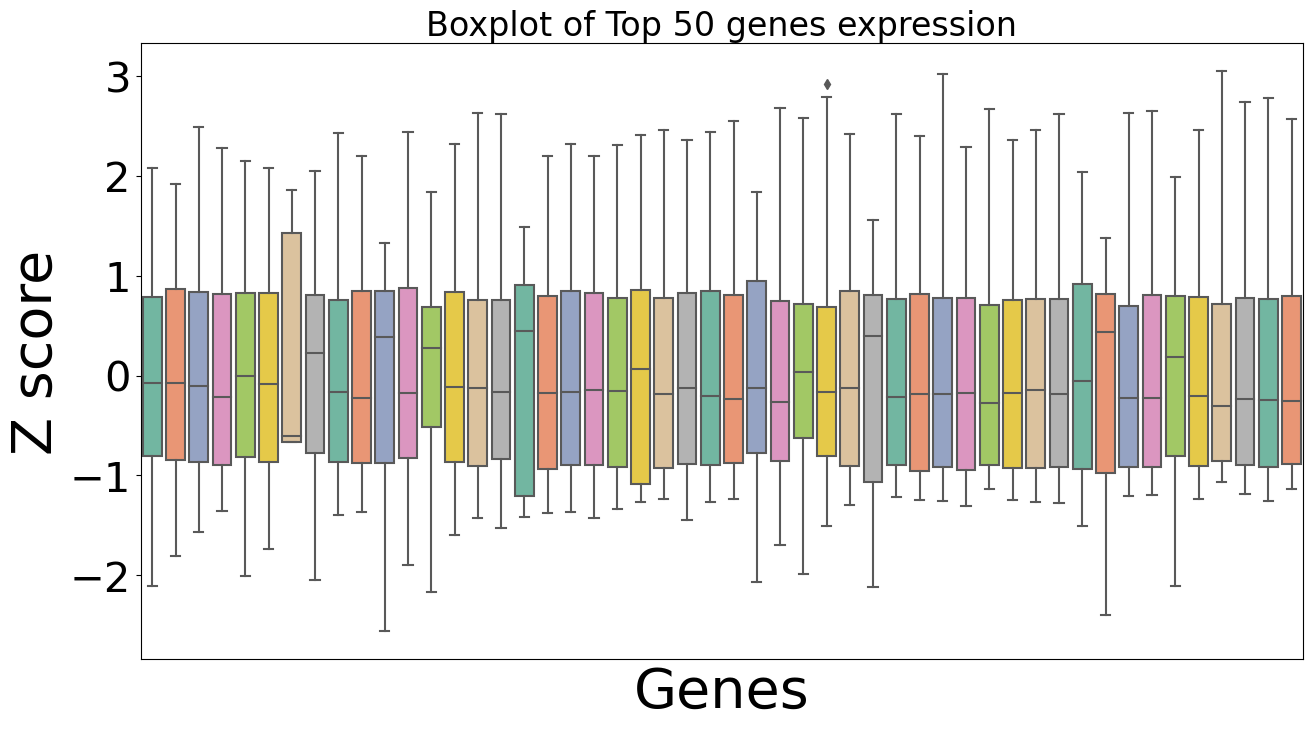

In [19]:
'''This boxplot shows gene expression  data that has been normalized through Z-score standarizationusing Seaborn
and Matplotlib'''
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(important_dataframe), columns=important_dataframe.columns)
# Crea un boxplot para la gene expression data normalizada
plt.figure(figsize=(15, 8))
sns.boxplot(data=normalized_data, orient="v", palette="Set2")
# Personaliza el gráfico
plt.ylabel('Z score')
plt.xlabel('Genes')
plt.title('Boxplot of Top 50 genes expression')
# Puedes agregar plt.xticks([]) si deseas ocultar las etiquetas del eje x
plt.xticks([])
# Muestra el gráfico
plt.show()

In [20]:
scaler = StandardScaler()
normalized_500 = pd.DataFrame(scaler.fit_transform(important_500_dataframe), columns=important_500_dataframe.columns)
normalized_500

gene_id  ENSG00000211592.8  ENSG00000211896.7  ENSG00000239951.1  \
0                 0.712403           0.891118           0.835180   
1                 0.337522          -0.133673           0.376934   
2                 0.858474           1.039062           0.880823   
3                 1.384938           1.485927           1.216433   
4                -0.277102          -0.276018          -0.594632   
..                     ...                ...                ...   
516              -0.362221          -0.476532          -0.496524   
517               0.919330           1.001257           0.972139   
518              -0.593424          -1.407209          -0.686355   
519               0.539705           0.598890           0.265545   
520               0.685768           0.731517           0.375036   

gene_id  ENSG00000253755.1  ENSG00000211895.5  ENSG00000211677.2  \
0                 0.579905           0.341250           0.697688   
1                 0.398346           0.867320           0.798571   
2                 0.847679           0.838617           0.841318   
3                 1.116774           1.128191           1.054434   
4                -0.322455           0.282638          -0.235881   
..                     ...                ...                ...   
516              -0.474796          -0.045708          -0.480403   
517               1.002775           0.971550           0.992418   
518              -1.274686          -0.188874          -0.614217   
519               0.645491           0.656279           0.770705   
520               0.610004           0.916352           0.847222   

gene_id  ENSG00000129824.16  ENSG00000168878.19  ENSG00000211666.2  \
0                 -0.664572           -1.602637           0.657034   
1                 -0.664572           -0.005769           0.454169   
2                  1.679801           -0.238569           0.786447   
3                 -0.590739            1.292944           1.426163   
4                 -0.645398           -1.982217          -0.556901   
..                      ...                 ...                ...   
516               -0.664572            0.775812          -0.520597   
517               -0.549445            0.192019           0.911506   
518               -0.561028            0.013945          -0.534046   
519               -0.597322            0.256132           0.249106   
520               -0.664572            1.132960           0.329893   

gene_id  ENSG00000241351.3  ...  ENSG00000168497.5  ENSG00000167996.16  \
0                 0.688071  ...          -0.576440           -1.053845   
1                 0.385596  ...          -0.282153            2.291421   
2                 0.992534  ...           0.997990           -0.730153   
3                 1.304392  ...          -1.343786            1.237489   
4                -0.604229  ...           0.575873           -0.790219   
..                     ...  ...                ...                 ...   
516              -0.582220  ...          -1.091424           -0.577433   
517               0.875670  ...          -0.756622            0.320752   
518              -0.666913  ...          -0.263077           -2.658086   
519               0.024437  ...          -1.051111            0.390235   
520               0.146809  ...          -1.938093            0.934831   

gene_id  ENSG00000169439.12  ENSG00000185133.14  ENSG00000163399.16  \
0                 -0.761002            0.395610           -2.438728   
1                 -0.367333           -0.174762           -0.220949   
2                  1.936431            0.881446            1.339455   
3                 -0.656529           -1.279978            0.086568   
4                 -0.284729            1.334425           -0.411106   
..                      ...                 ...                 ...   
516               -1.756836           -0.912574           -2.414988   
517               -0.956440           -0.391283           -0.836840 

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

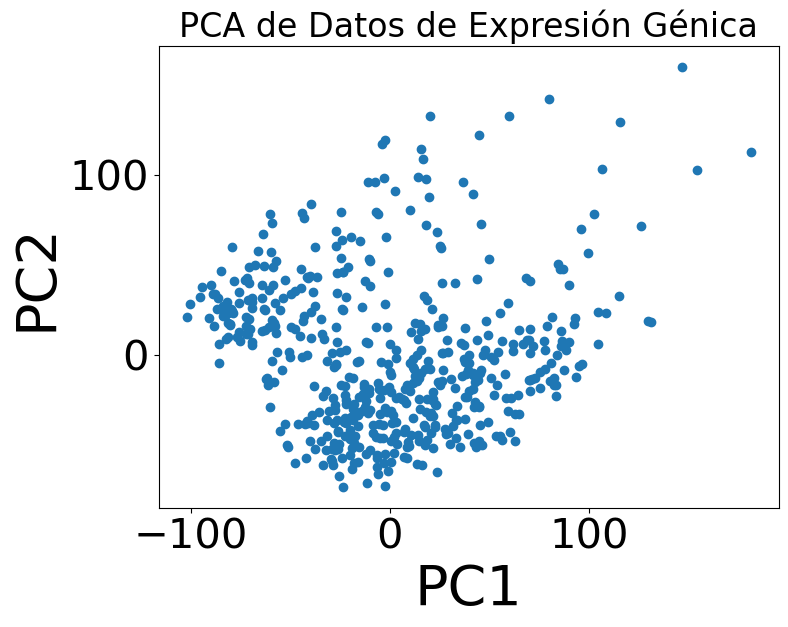

In [21]:
from sklearn.decomposition import PCA
n_componentes = 2  # Elige el número de componentes principales que deseas
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(transpose)
plt.figure(figsize=(8, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1])
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.title('PCA de Datos de Expresión Génica')
plt.show()

In [22]:
#remove low quality samples 
strict = transpose.drop(index=['00f54652-691e-4446-869a-4dd51c236f56', '036f7712-a636-4198-b568-6c85d9db4a3b', '0386037f-728c-47b0-93d0-6bb81b8b2a05', '0cfde228-89bc-4454-a894-d6fc4b032892', '144be06b-54da-4b42-a219-8bbe88cc7f78', '153946fb-8375-4d84-ad2f-2988722b845e', '164fe0cc-c07d-4d09-adfd-cca86b737aa3', '185ecfd0-680c-4874-8667-5d7543ec562c', '193da121-43e7-40ab-8e0e-980c62586568', '1c4e7140-e649-4267-92ac-f30d65d795e5', '1e100c4d-13eb-4e5a-9117-ead385902710', '1e31f670-de56-4122-8966-42767135b420', '1ff78fb6-b27a-4946-b39f-c87d6dfa669d', '20c70125-f4ec-4d52-9efd-a207b559fedc', '2231c28a-bf18-4c0c-885c-42896df3b0e8', '284b2aab-f424-43d3-b160-78f2c28ecf94', '28da87d8-0ac9-4a62-9591-67a713bfe4e7', '28ecaa28-d2dc-4988-a484-544d4ad7355d', '2a51bda3-fb5e-4eb6-bc86-e78dca8c4e2b', '2a90f5ad-a9d0-4f5d-a255-3e8233039868', '2b7a660d-f472-476a-9145-cae4f3ba5e4c', '2df38eb8-5350-4951-9159-a8add6474efe', '2ea7afdd-f947-47e6-9516-b6f38e0a1967', '30b75646-82f8-467f-8f2b-b71b97af3bc6', '3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6', '3762f95e-180b-43c2-967c-0e138fb23b63']) #canviar el nom de la mostra que cal eliminar 
print(strict.shape)
strict.head()
'''PORTAR A DALT'''

(495, 18986)


'PORTAR A DALT'

In [23]:
features = strict.columns
x = strict.loc[:, features].values
x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
x

array([[-8.37671398e-01, -4.12594044e-04, -6.58906239e-01, ...,
        -7.45089272e-01, -5.56535523e-01, -1.27244892e+00],
       [ 1.35125875e+00,  1.19286520e+00,  1.82286780e+00, ...,
        -6.09529447e-02,  7.88691883e-01,  1.94506657e+00],
       [ 6.29463346e-01,  7.76304974e-01,  1.78618230e+00, ...,
         7.14062174e-01, -1.56053640e-01,  8.73014124e-01],
       ...,
       [ 1.33630694e+00,  1.54237405e-01, -6.47827290e-01, ...,
        -8.39662126e-01, -3.17162126e-01, -1.37320155e+00],
       [-1.28232174e+00, -2.51315228e+00, -1.14481607e+00, ...,
         5.23062161e-01, -7.72528846e-01, -1.55366718e+00],
       [-1.01851931e+00, -1.08461068e+00, -2.25957902e+00, ...,
         2.98623869e-01, -8.22765943e-01, -2.19202250e+00]])

In [24]:
pca.explained_variance_ratio_

array([0.28783378, 0.10305237])

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

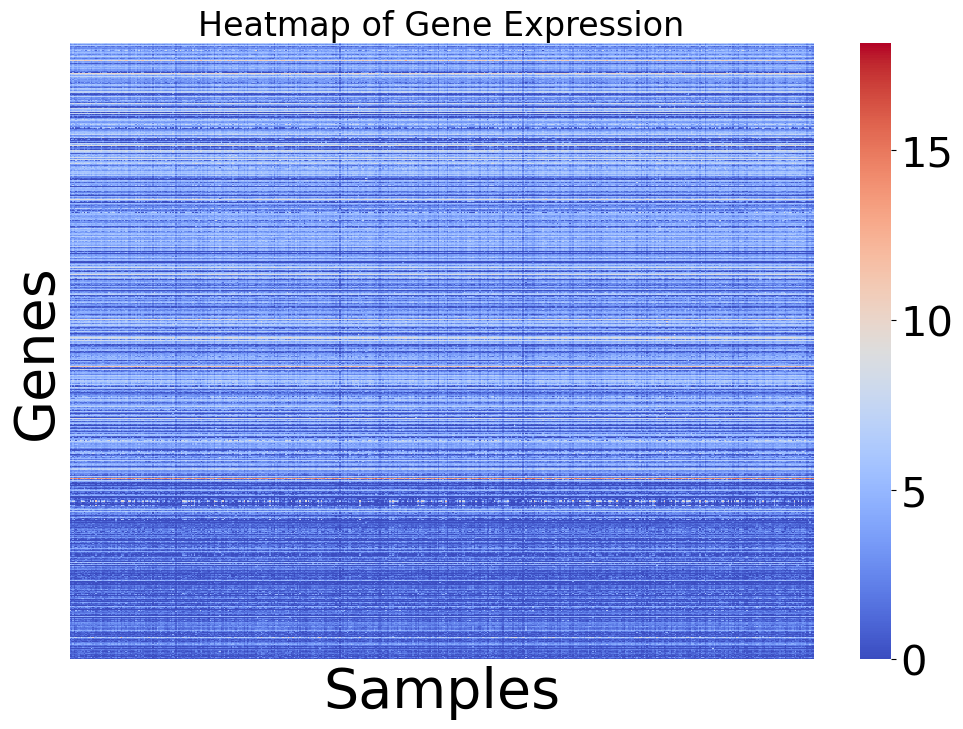

In [25]:
'''HEATMAP OF GENE EXPRESSION   ---> ARREGLAR, ferlo sobre el z-score'''
plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(log2_tpm_PO, cmap='coolwarm', annot=False, cbar=True)
# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of Gene Expression')
plt.xticks([])
plt.yticks([])
# Show the plot
plt.show()

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

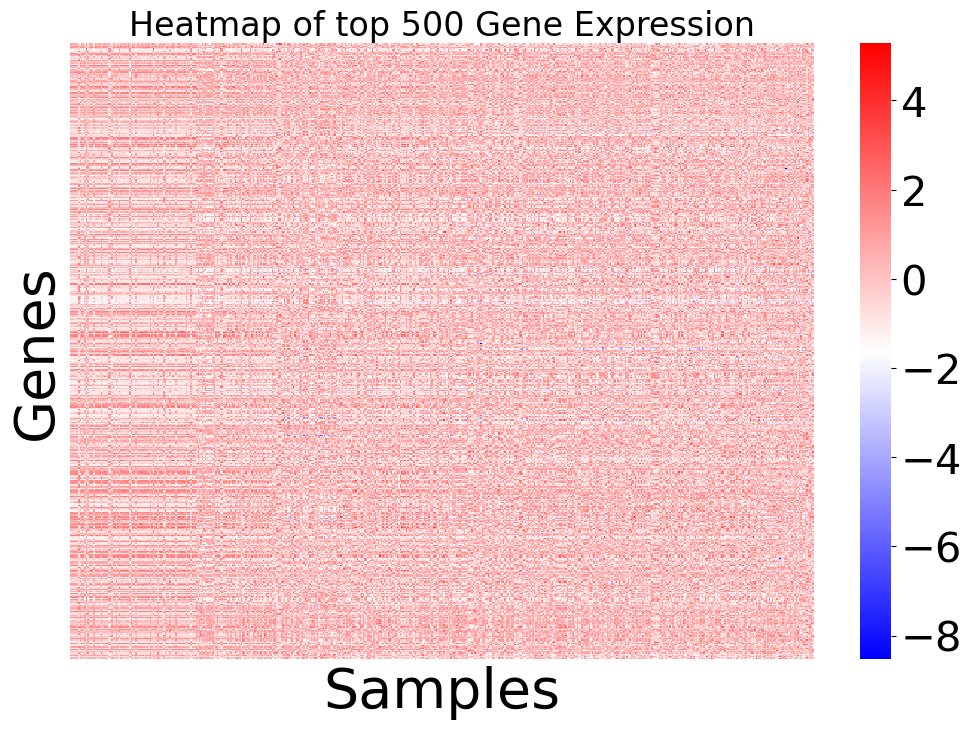

In [26]:
'''Z-SCORE HEATMAP'''

plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(normalized_500, cmap='bwr', annot=False, cbar=True)

# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of top 500 Gene Expression')

plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\valld\AppData\Local\Temp\ipykernel_16516\75448324.py:8: UserWarning: The figure layout has changed to tight
  matplotlib.pyplot.tight_layout()


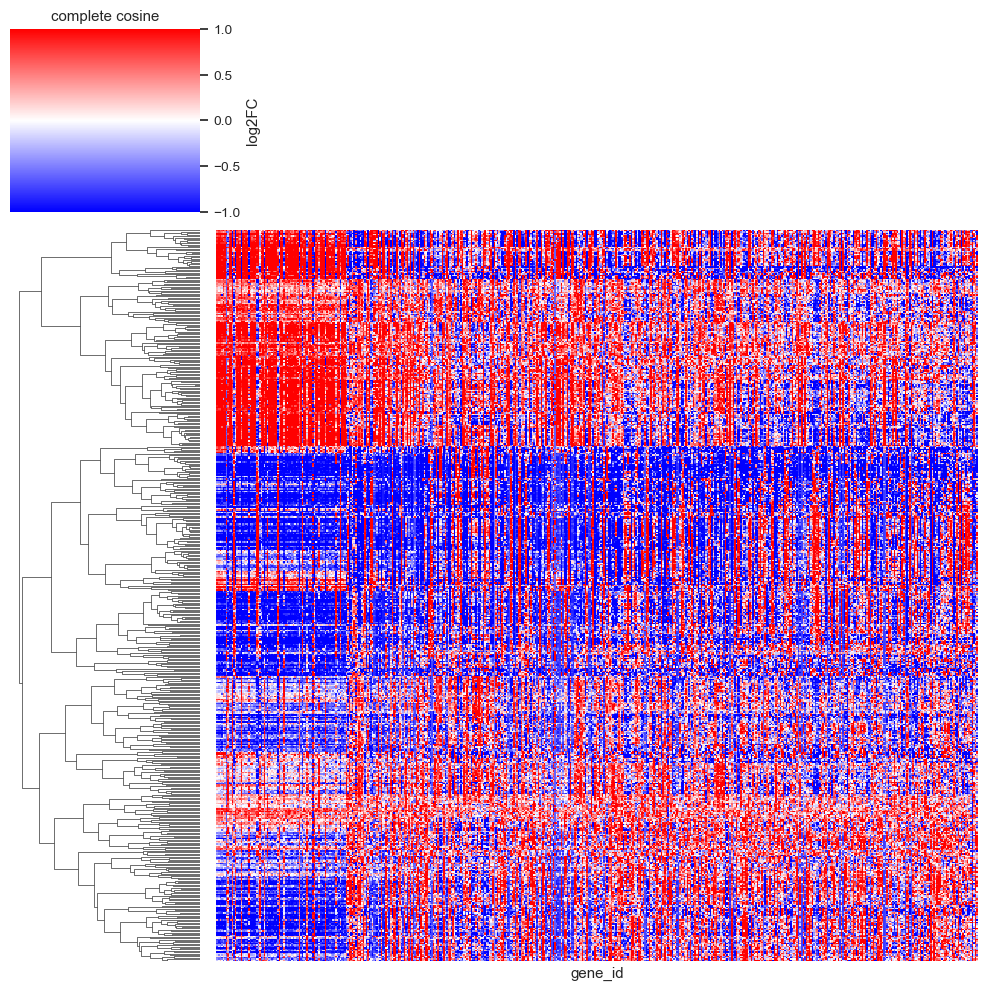

In [27]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(normalized_500, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, method=linkage_method, metric=distance_metric, yticklabels=[], xticklabels = [], cbar_kws={'label':'log2FC'})

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\valld\AppData\Local\Temp\ipykernel_16516\3905422196.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


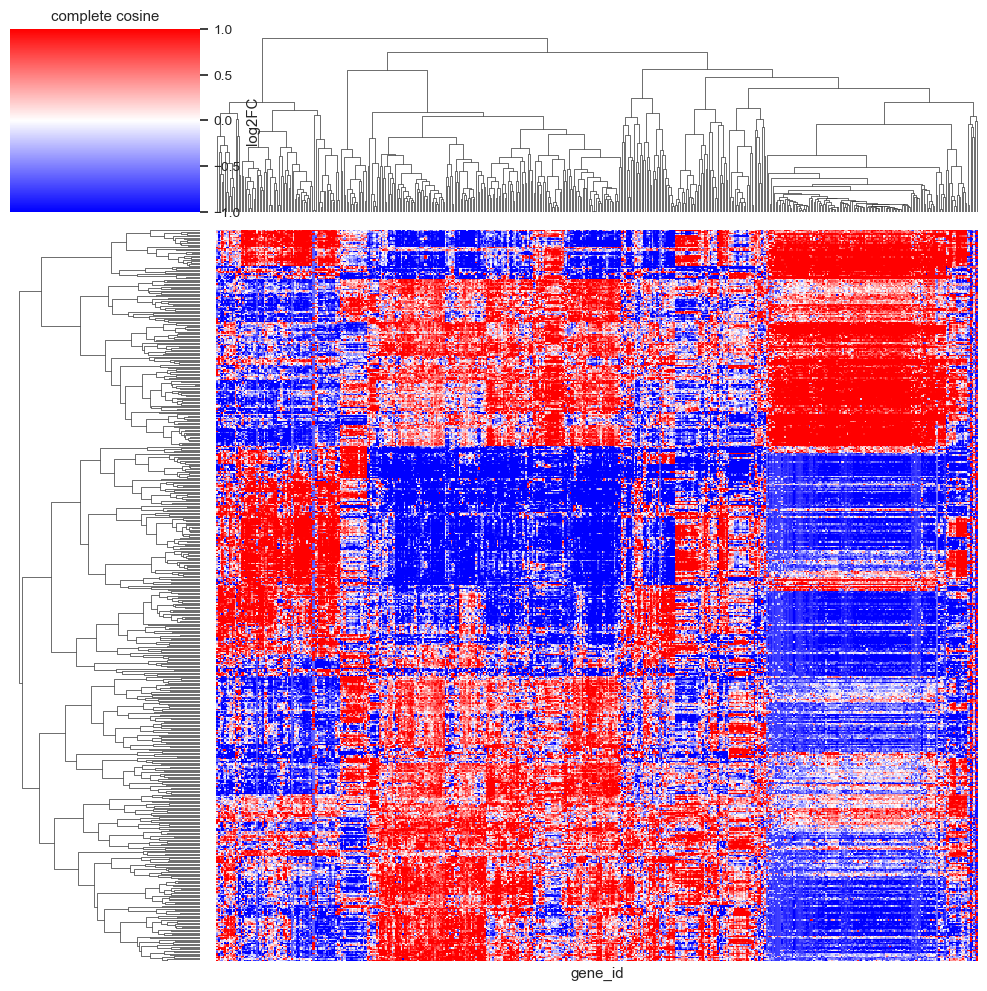

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

linkage_method = 'complete'
distance_metric = 'cosine'

sns.set(font_scale=0.9)
sns.clustermap(
    normalized_500,  # Tus datos normalizados
    cmap='bwr',   # Mapa de colores
    col_cluster=True,  # Realizar clustering en el eje de las columnas
    row_cluster=True,  # Realizar clustering en el eje de las filas
    vmin=-1,  # Valor mínimo en el mapa de colores
    vmax=1,   # Valor máximo en el mapa de colores
    method=linkage_method,  # Método de enlace para el clustering
    metric=distance_metric,  # Métrica de distancia
    yticklabels=[],  # Mostrar etiquetas en el eje y
    xticklabels=[],  # Etiquetas en el eje x
    cbar_kws= {'label': 'log2FC'}  # Etiqueta para la barra de color

)


plt.title('{} {}'.format(linkage_method, distance_metric))
plt.tight_layout()
plt.show()

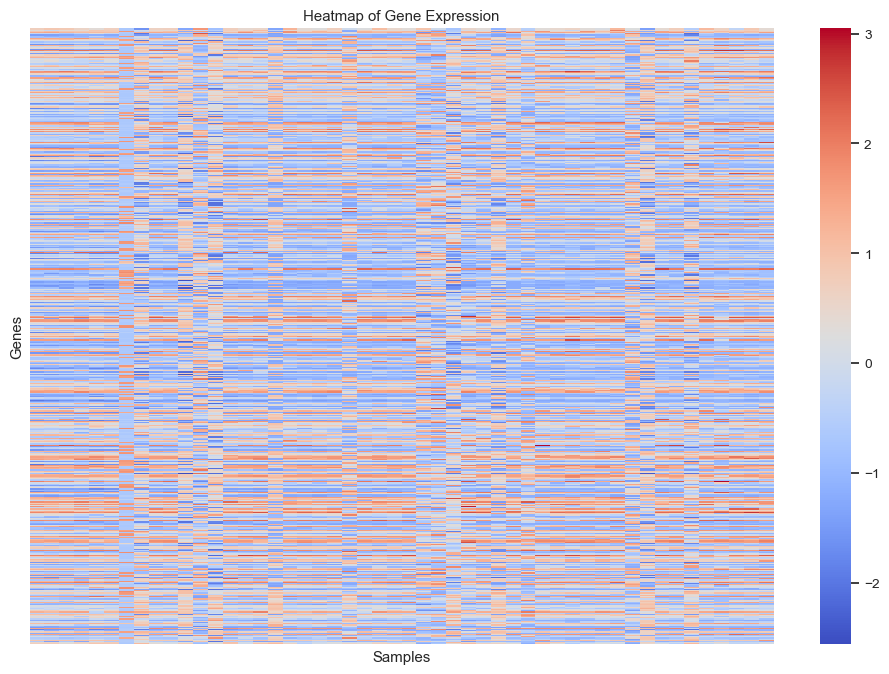

In [29]:
'''HEATMAP of top 50 gene expresion'''
plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(normalized_data, cmap='coolwarm', annot=False, cbar=True)
# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of Gene Expression')
plt.xticks([])
plt.yticks([])
# Show the plot
plt.show()

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
'''Clustering'''
#To visualize the created clusters using the K-means method, we will perform a PCA for each K value.

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2, Calinski-Harabasz Analysis Index: 544.23


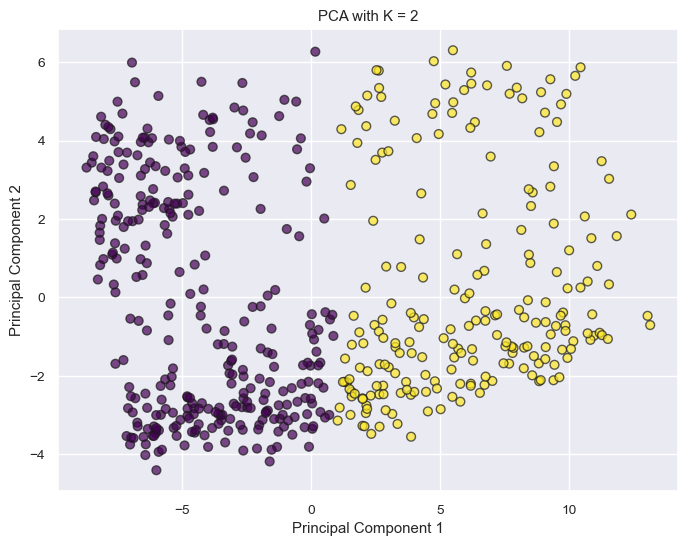

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3, Calinski-Harabasz Analysis Index: 429.39


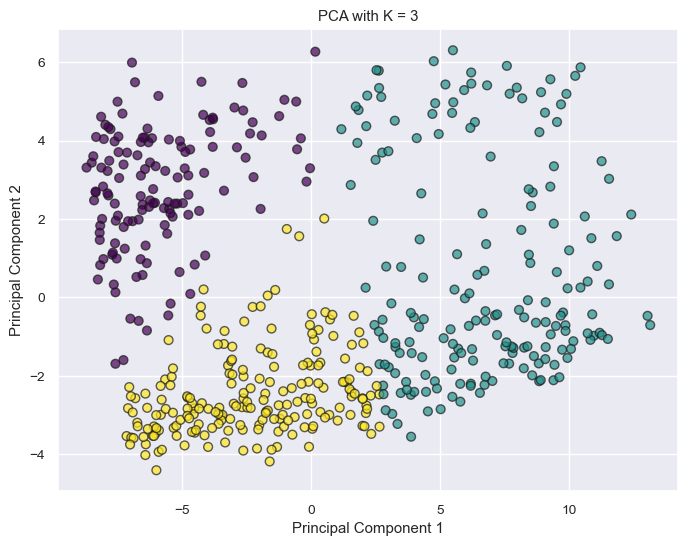

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4, Calinski-Harabasz Analysis Index: 387.44


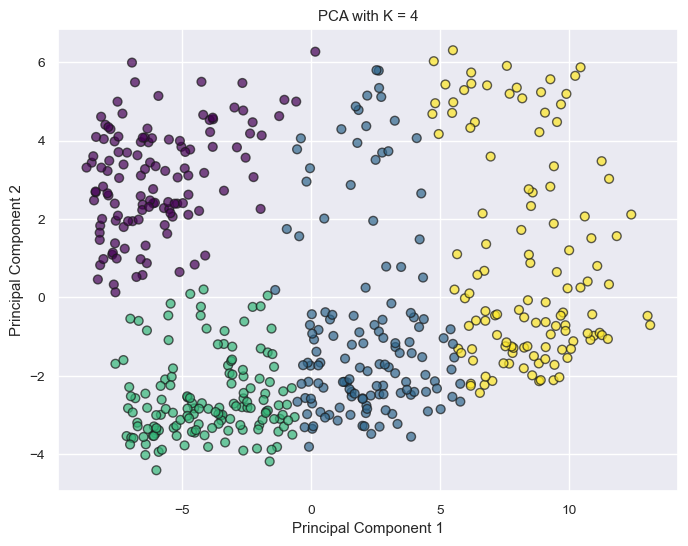

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5, Calinski-Harabasz Analysis Index: 352.92


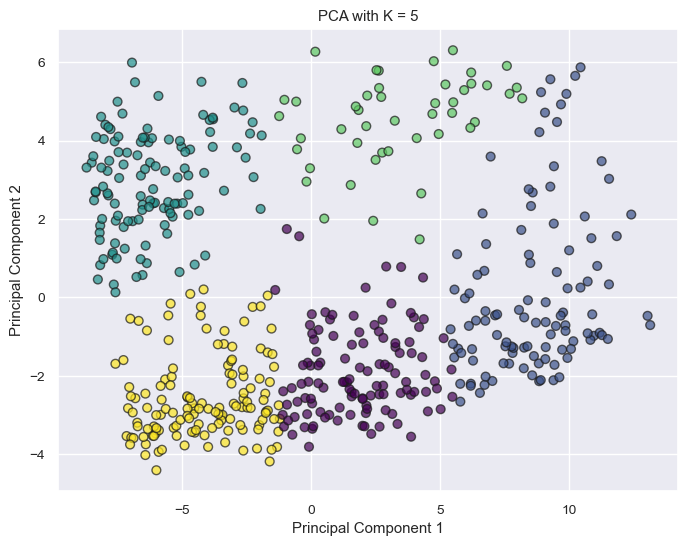

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6, Calinski-Harabasz Analysis Index: 315.99


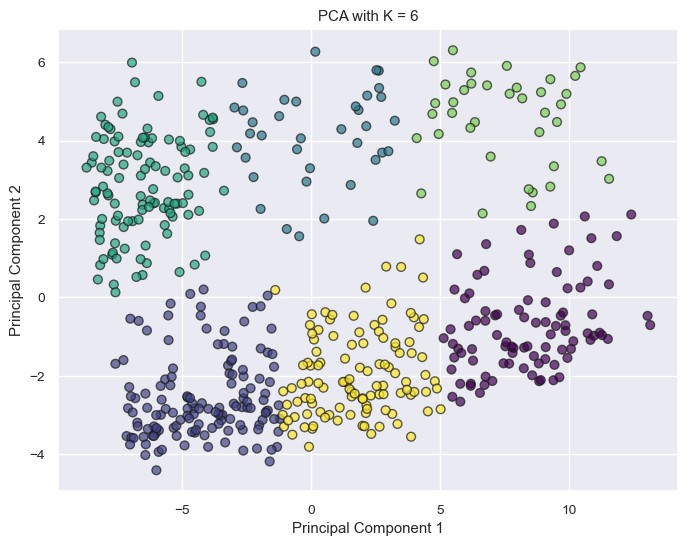

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8, Calinski-Harabasz Analysis Index: 264.67


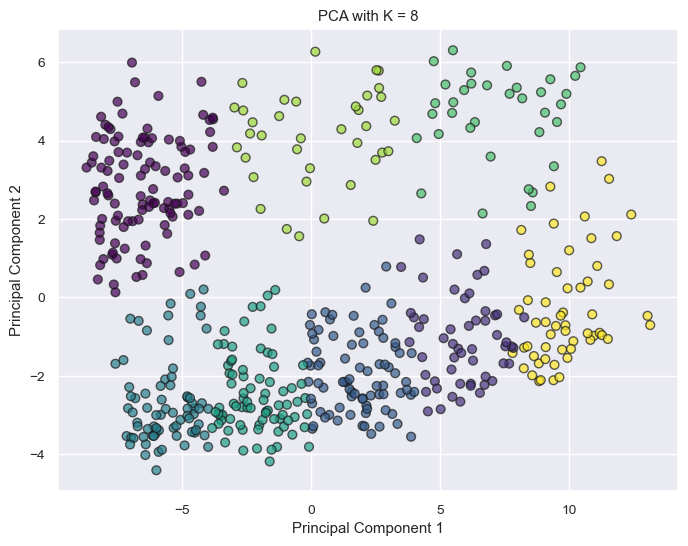

In [32]:
##Calinski - Harabasz analysis for K-means clustering
#When using Calinsky - Harabasz analysis to evaluate K-means clustering performance, the higher the score means that our clusters are better defined in the model. 
#The given index/score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters.

n_cluster = [2, 3, 4, 5, 6, 8]

for clusters in n_cluster:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    calinski_harabasz_index = calinski_harabasz_score(normalized_data, cluster_labels)
    print(f'Number of Clusters: {clusters}, Calinski-Harabasz Analysis Index: {calinski_harabasz_index:.2f}')
    
    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(normalized_data)
    plt.figure(figsize = (8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = .7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2, Davies Bouldin Analysis Index: 0.94


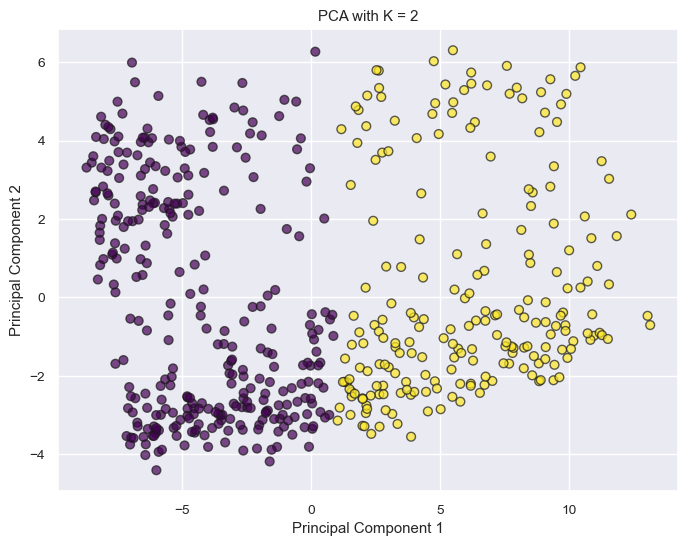

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3, Davies Bouldin Analysis Index: 1.12


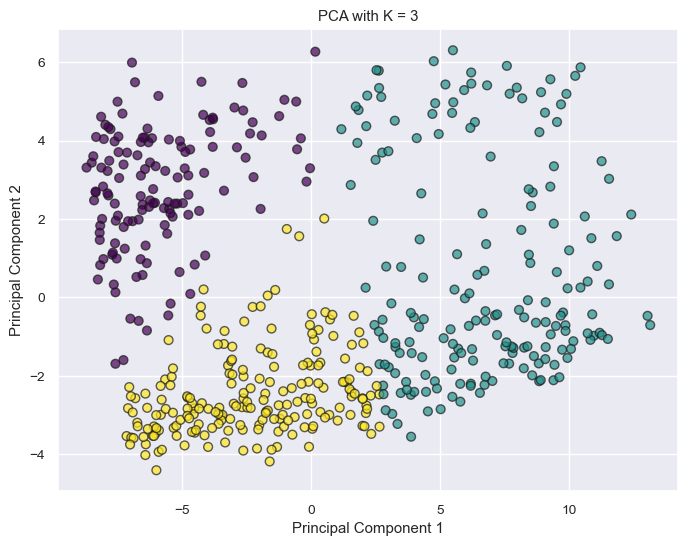

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4, Davies Bouldin Analysis Index: 1.22


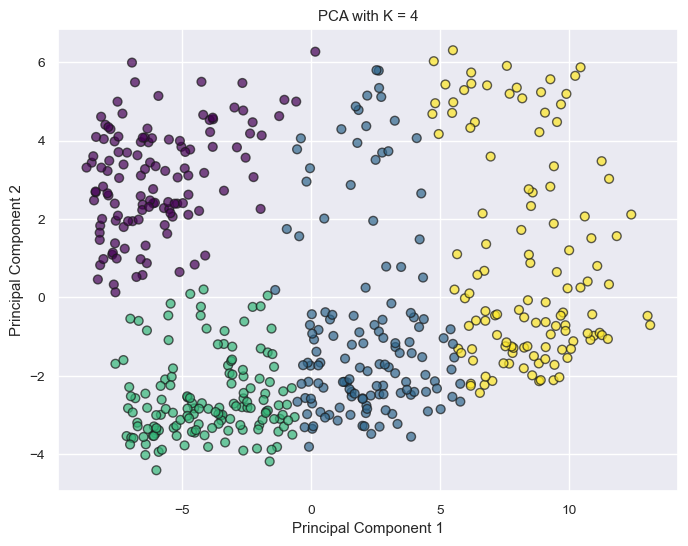

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5, Davies Bouldin Analysis Index: 1.14


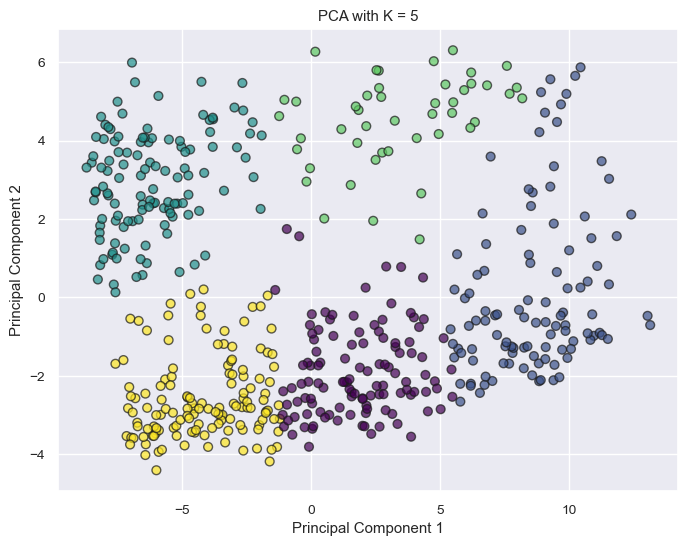

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6, Davies Bouldin Analysis Index: 1.19


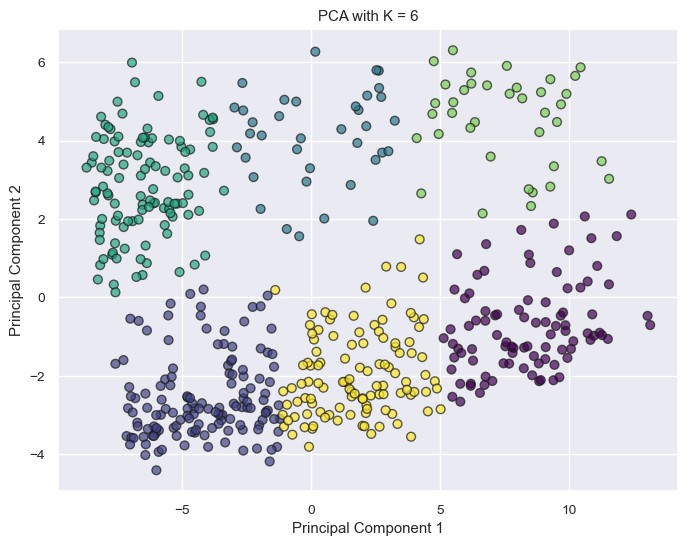

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8, Davies Bouldin Analysis Index: 1.42


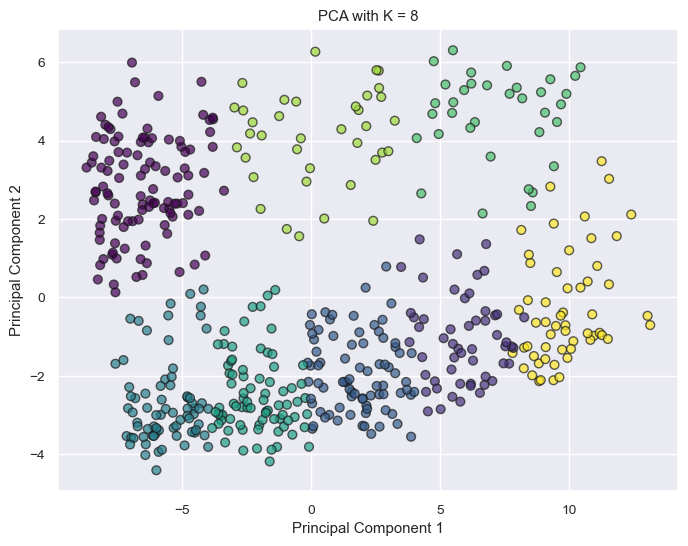

In [33]:
##Davies Bouldin analysis for K-means clustering
n_cluster = [2, 3, 4, 5, 6, 8]

for clusters in n_cluster:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    davies_bouldin_index = davies_bouldin_score(normalized_data, cluster_labels)
    print(f'Number of Clusters: {clusters}, Davies Bouldin Analysis Index: {davies_bouldin_index:.2f}')
    
    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(normalized_data)
    plt.figure(figsize = (8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = .7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2, Silhouette Score: 0.41


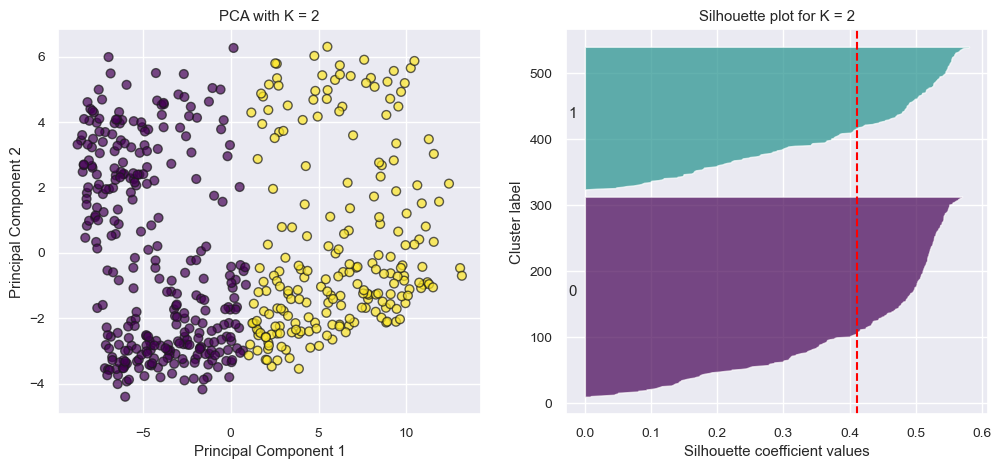

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3, Silhouette Score: 0.33


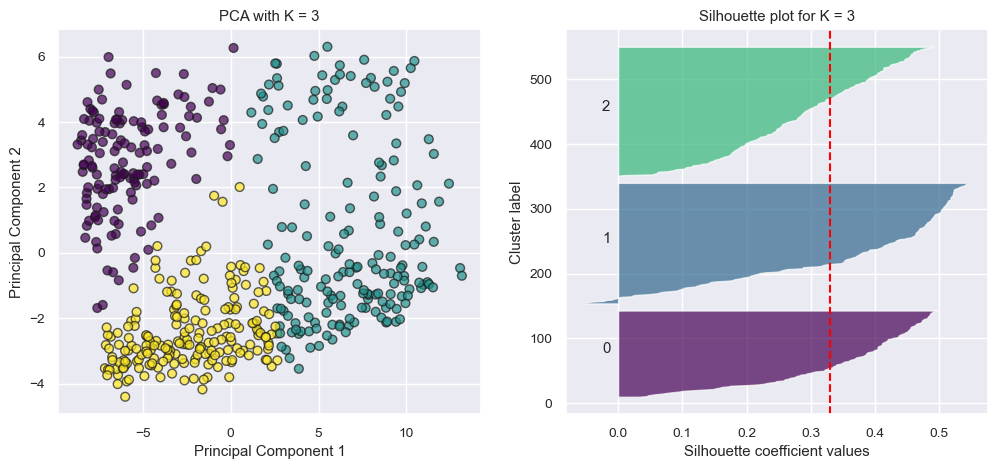

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4, Silhouette Score: 0.28


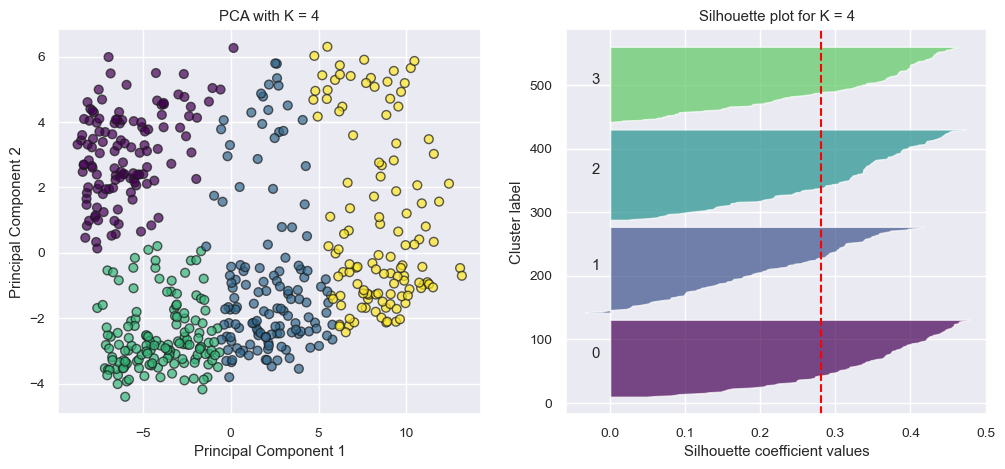

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5, Silhouette Score: 0.29


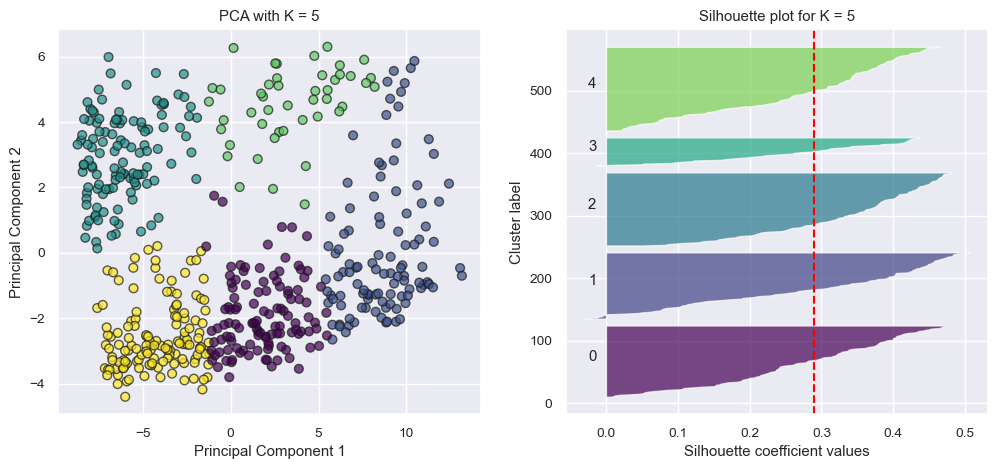

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6, Silhouette Score: 0.28


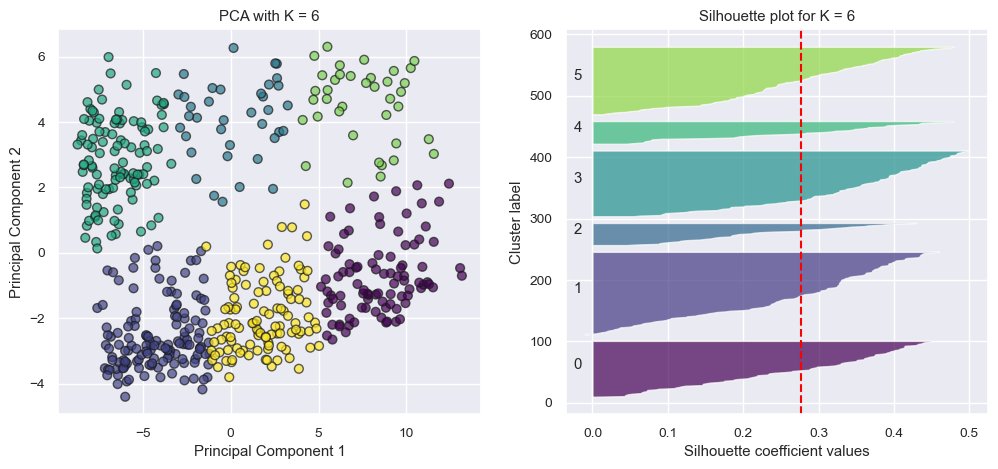

C:\Users\valld\miniconda3\envs\advancedbioinfo\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8, Silhouette Score: 0.21


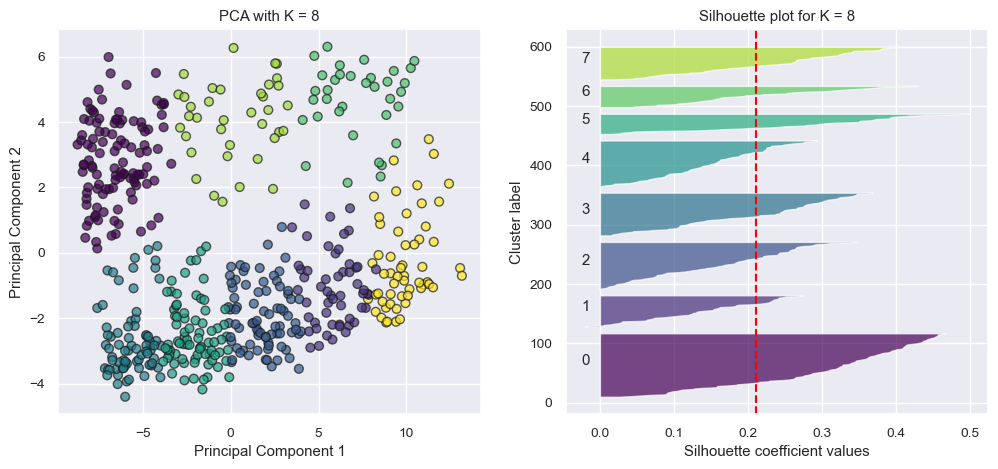

In [34]:
##Silhouette analysis for K-means clustering
n_clusters = [2, 3, 4, 5, 6, 8]

for clusters in n_clusters:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    print(f'Number of Clusters: {clusters}, Silhouette Score: {silhouette_avg:.2f}')

    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(normalized_data)
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = 0.7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.subplot(1, 2, 2)
    sample_silhouette_values = silhouette_samples(normalized_data, cluster_labels)
    y_lower = 10
    for i in range(clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)
        plt.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    plt.title(f'Silhouette plot for K = {clusters}')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')
    plt.show()